In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [74]:
df = pd.read_csv('top_1000_tiktokers.csv')
df.head()

,Rank,Username,Tiktok Link,Name,Subscribers Count,Views. Avg,Likes. Avg,Comments. Avg,Shares. Avg
0,1,badbunny,https://www.tiktok.com/@badbunny,Bad Bunny,23.4M,63.1M,10.3M,65.2K,108.6K
1,2,noahschnapp,https://www.tiktok.com/@noahschnapp,Noah Schnapp,26.1M,23.4M,4.8M,46.7K,22.1K
2,3,khaby.lame,https://www.tiktok.com/@khaby.lame,Khabane lame,145.9M,47.5M,2.5M,46K,9.4K
3,4,coopernoriega,https://www.tiktok.com/@coopernoriega,Cooper Noriega,3.2M,31M,1.3M,120.9K,8.4K
4,5,avrillavigne,https://www.tiktok.com/@avrillavigne,Avril Lavigne,4M,24.7M,3.5M,32.1K,22.7K


In [75]:
df.drop(['Username', 'Tiktok Link', 'Name'], axis=1, inplace=True)
df.head()

,Rank,Subscribers Count,Views. Avg,Likes. Avg,Comments. Avg,Shares. Avg
0,1,23.4M,63.1M,10.3M,65.2K,108.6K
1,2,26.1M,23.4M,4.8M,46.7K,22.1K
2,3,145.9M,47.5M,2.5M,46K,9.4K
3,4,3.2M,31M,1.3M,120.9K,8.4K
4,5,4M,24.7M,3.5M,32.1K,22.7K


## Fix Data Types

In [76]:
df.dtypes

Rank                  int64
Subscribers Count    object
Views. Avg           object
Likes. Avg           object
Comments. Avg        object
Shares. Avg          object
dtype: object

In [77]:
# non-target features
x_cols = df.columns[1:]

for col in x_cols:
    col_suffixes = list(set([suffix for suffix in df[col].str[-1] if suffix.isalpha()]))
    print(f'Unique suffixes for {col}: {col_suffixes}')

Unique suffixes for Subscribers Count: ['M', 'K']
Unique suffixes for Views. Avg: ['M', 'K']
Unique suffixes for Likes. Avg: ['M', 'K']
Unique suffixes for Comments. Avg: ['K']
Unique suffixes for Shares. Avg: ['K']


In [79]:
def str_to_float(str_num):
    if type(str_num) == str:
        if str_num[-1] == 'M':
            return float(str_num[:-1]) * 1_000_000
        elif  str_num[-1] == 'K':
            return float(str_num[:-1]) *1_000
        else:
            return float(str_num)
    else:
        return str_num

thousand_ex = '10.3K'
mill_ex = '324.5M'
hund_ex = '123'

print(f'{thousand_ex} becomes {str_to_float(thousand_ex)}')
print(f'{mill_ex} becomes {str_to_float(mill_ex)}')
print(f'{hund_ex} becomes {str_to_float(hund_ex)}')

10.3K becomes 10300.0
324.5M becomes 324500000.0
123 becomes 123.0


In [80]:
for col in df.columns[1:]:
    df[col] = df[col].map(lambda x: str_to_float(x))

df.head()

,Rank,Subscribers Count,Views. Avg,Likes. Avg,Comments. Avg,Shares. Avg
0,1,23400000.0,63100000.0,10300000.0,65200.0,108600.0
1,2,26100000.0,23400000.0,4800000.0,46700.0,22100.0
2,3,145900000.0,47500000.0,2500000.0,46000.0,9400.0
3,4,3200000.0,31000000.0,1300000.0,120900.0,8400.0
4,5,4000000.0,24700000.0,3500000.0,32100.0,22700.0


# Exploratory Data Analysis

In [81]:
df[x_cols].describe()

,Subscribers Count,Views. Avg,Likes. Avg,Comments. Avg,Shares. Avg
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,6.906116e+06,3.330490e+06,3.995059e+05,3464.326000,3649.304000
std,1.139041e+07,3.514470e+06,4.632153e+05,6389.809003,6019.052223
min,3.700000e+03,6.679000e+05,4.570000e+04,0.000000,95.000000
25%,1.300000e+06,1.800000e+06,2.232500e+05,1200.000000,928.500000
50%,3.500000e+06,2.600000e+06,3.049000e+05,2000.000000,1900.000000
75%,7.925000e+06,3.700000e+06,4.372250e+05,3400.000000,3900.000000
max,1.459000e+08,6.310000e+07,1.030000e+07,120900.000000,108600.000000


Transforming Subscribers Count with lambda = 0.17466759525241948
Transforming Views. Avg with lambda = -0.3552276470926497
Transforming Likes. Avg with lambda = -0.18576848974199864
Transforming Comments. Avg with lambda = 0.07319704734975091
Transforming Shares. Avg with lambda = -0.04638530260865479


C:\Users\Patrick\AppData\Local\Temp/ipykernel_11728/1533269314.py:14: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_boxcox.hist(ax=ax)


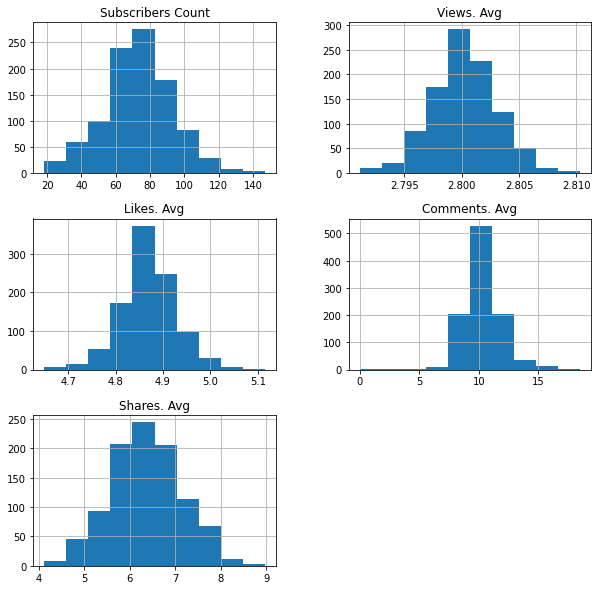

In [106]:
from scipy import stats
def df_boxcox_transform(df):
    df_vals = np.zeros(df.shape)
    for i, col in enumerate(df.columns):
        values, l = stats.boxcox(df[col]+1)
        print(f'Transforming {col} with lambda = {l}')
        df_vals[:, i] = values
    df_transformed = pd.DataFrame(df_vals, columns=df.columns)
    return df_transformed

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df_boxcox = df_boxcox_transform(df[x_cols])
df_boxcox.hist(ax=ax)
plt.show()

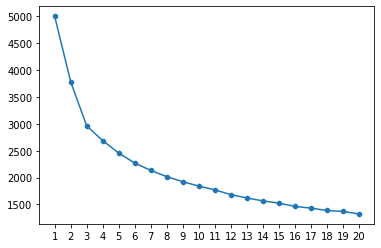

In [147]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

scaled_values = ss.fit_transform(df_boxcox)

k_range = range(1, 21)

sse = []
for k in k_range:
    kmeans = KMeans(k, random_state=123)
    kmeans.fit(scaled_values)

    sse.append(kmeans.inertia_)

sns.lineplot(x=k_range, y=sse)
sns.scatterplot(x=k_range, y=sse)

plt.xticks(k_range)
plt.show()

In [210]:
kmeans = KMeans(3, random_state=123)
kmeans.fit(scaled_values)

df_scaled = pd.DataFrame(scaled_values, columns=x_cols)
df_scaled['cluster assignment'] = kmeans.labels_

In [134]:
agg_cluster_stats = df.groupby('cluster assignment').agg(['mean', 'std', 'count']).round(2)
agg_cluster_stats

Rank               Subscribers Count                     \
                      mean     std count              mean          std count   
cluster assignment                                                              
0                   623.76  241.05   315        1875060.32   2312054.39   315   
1                   590.92  223.18   475        7869168.63   8723429.28   475   
2                   111.10   68.00   210       12274364.76  19243736.39   210   

                    Views. Avg                   Likes. Avg                   \
                          mean         std count       mean        std count   
cluster assignment                                                             
0                   1785691.75   731533.76   315  218053.02   90206.61   315   
1                   2957045.68  1172214.18   475  329619.16  121658.71   475   
2                   6492380.95  6415571.60   210  829762.38  856208.53   210   

                   Comments. Avg                 Shares. Avg                 
                            mean       std count        mean      std count  
cluster assignment                                                           
0                        2411.35   1850.78   315     5416.90  5707.20   315  
1                        1926.43   1598.70   475     1143.57   850.92   475  
2                        8522.38  12307.17   210     6665.64  9719.68   210

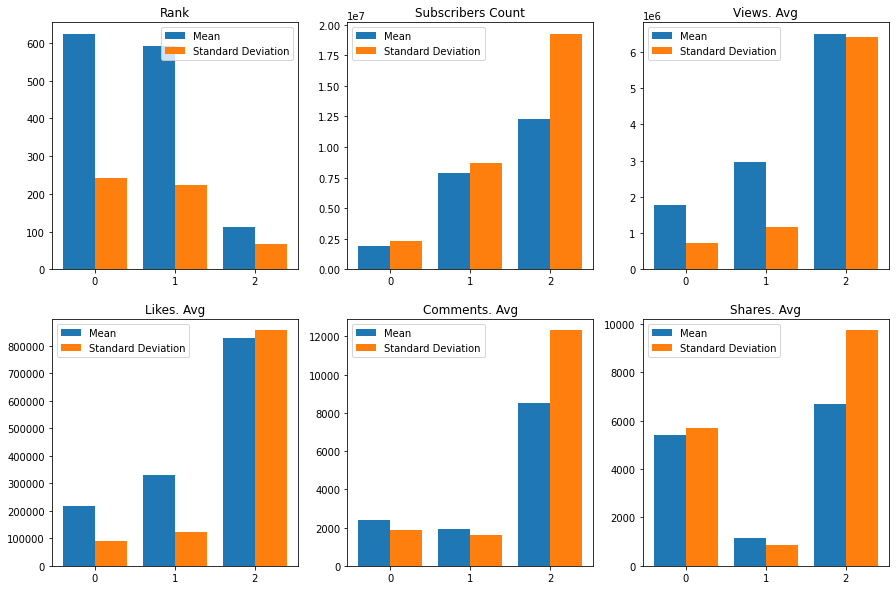

In [174]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

for col, ax in zip(df.columns, np.ravel(axes)):
    x_ix = np.arange(agg_cluster_stats[col]['std'].shape[0])
    ax.bar(x=x_ix-0.2, height=agg_cluster_stats[col]['mean'].values, width=0.4, label='Mean')
    ax.bar(x=x_ix+0.2, height=agg_cluster_stats[col]['std'].values, width=0.4, label='Standard Deviation')
    ax.set_xticks(ticks=x_ix)
    ax.set_title(col)
    ax.legend()

From the above, the clusters can be described as followed:
* The 0th cluster has a fairly low mean rank. Relative to the other clusters, it consists of users with the fewest subcribers and low mean numbers of views, likes, and comments. HOwever, it has a relatively high mean number of shares, albeit with a high standard deviation on the distribution of shares.
* The 1st cluster has a similar mean rank to the 0th. However, it has a much lower mean number of average sharwes and higher subscriber counts and mean views. The mean number of average comments is similar to the 0th cluster.
* The 2nd cluster has the lowest mean rank and an accompanying low standard deviation, meaning it consists of higher ranked users. It has high values for subscriber counts and mean number of average views, likes, comments and shares. However, all of these values have very high associated standard deviation.

<AxesSubplot:>

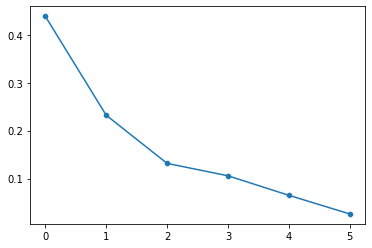

In [212]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=[f'pc_{i+1}' for i in range(df_scaled.shape[1])])
df_pca['cluster assignment'] = kmeans.labels_

sns.lineplot(x=range(len(pca.explained_variance_ratio_)), y=pca.explained_variance_ratio_)
sns.scatterplot(x=range(len(pca.explained_variance_ratio_)), y=pca.explained_variance_ratio_)

<AxesSubplot:xlabel='pc_1', ylabel='pc_2'>

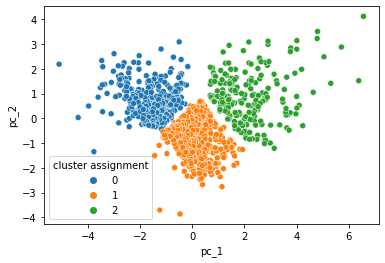

In [221]:
sns.scatterplot(data=df_pca, x='pc_1', y='pc_2', hue='cluster assignment', palette='tab10')